# File Creater for the TOLIMAN Pupil

Install necessary packages

In [2]:
%pip install numpy-stl -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import jax.numpy as np

import dLux as dl
import dLux.utils as dlu
import dLuxToliman as dlT
import OpticsSupport
import PlottingSupport

## Parameters

In [4]:
# Aperture parameters
ratio = 1                           # Ratio to scale the aperture by (e.g. 5 = 5-inch aperture becomes 1-inch aperture)
aperture_npix = 5000                # Number of pixels across the aperture
aperture_diameter = 0.125/ratio     # Clear aperture diameter (m)
secondary_diameter = 0.032/ratio    # Secondary mirror diameter (m)
spider_width       = 0.002/ratio    # Spider width (m)

# Observations wavelegths (bandpass of 530-640nm)
wavelengths = np.linspace(530e-9, 640e-9, 100)  # Wavelengths to simulate (m)

# Subtrate parameters
n1 = 1          # Refractive index of free space
n2 = 1.5424     # Refractive index of Zerodur

# Mask
mask_path = 'diffractive_pupil.npy'
phase_mask = np.load(mask_path) * np.pi     # Load the mask and convert to phase

# Grating parameters
amplitude = 375e-9                          # Amplitude of the grating (m). Peak to peak amplitude of the grating etched in the glass
det_npixels = 2048                          # DO NOT TOUCH
pixel_scale = dlu.arcsec2rad(0.375)*ratio   # 0.375 arcsec per pixel
max_reach = 0.8                             # Max wavelength to diffract to 80% of the diagonal length of the detector

Create the mask

In [5]:
# Make the mask
mask, raw_mask, X, Y = OpticsSupport.HelperFunctions.make_grating_mask(phase_mask, aperture_npix, aperture_diameter, secondary_diameter, spider_width, wavelengths, amplitude, det_npixels, pixel_scale, max_reach, n1, n2, out = 0., apply_spiders=False, return_raw=True)

Grating amplitude: 12.154280662536621
Nyquist Ratio: 6.0771403312683105
Grating period: 0.000303856999380514m


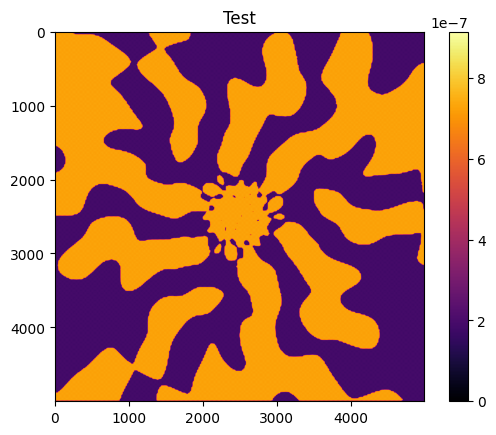

In [7]:
PlottingSupport.Plotting.print_colormap(mask, title="Mask", colormap="inferno",colorbar=True)

`mask` output here is a _depth_ for generating stl files. To get the equivilent opd, create a new depth_to_phase function and then pass the output to the `phase_to_opd(phase_mask, mean_wl)` and then use the code below

In [ ]:
import dLux.utils as dlu

opd_mask = dlu.phase2opd(phase_mask, wavelengths.mean())

wf_npixels = aperture_npix
opd_mask = raw_mask*(n2-n1)
phase_mask = dlu.opd2phase(opd_mask, wavelengths.mean())
mask = dl.Optic(phase=phase_mask)
optics = dlT.TolimanOpticalSystem(wf_npixels=wf_npixels, mask=mask, psf_npixels=det_npixels, oversample=1)
#source = dlT.AlphaCen(n_wavels=100, separation=8, position_angle=30)
source = dlT.AlphaCen(n_wavels=10, separation=8, position_angle=30)


# # psf = optics.propagate(wavelengths)
# instrument = dlT.Toliman(optics, source)
# instrument = instrument.set("diameter", instrument.diameter/ratio)
# instrument = instrument.set("psf_pixel_scale", instrument.psf_pixel_scale*ratio)
# instrument = instrument.set("source.separation", instrument.source.separation*ratio)

# psf = instrument.model()


# c = psf.shape[0]//2
# s = 64

# plt.imshow(psf[c-s:c+s, c-s:c+s])
# # plt.imshow(psf)
# plt.colorbar()
# plt.show()

KeyboardInterrupt: 

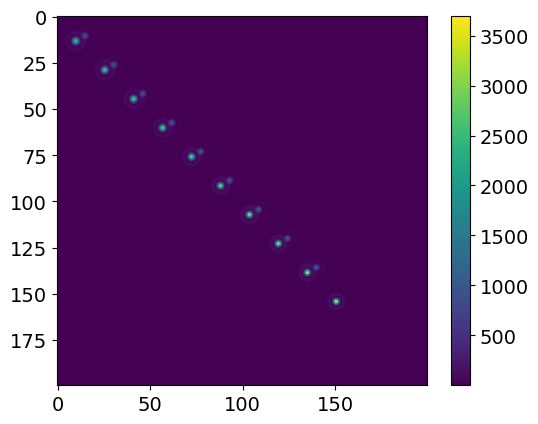

In [ ]:
# plt.imshow(psf[c-s:c+s, c-s:c+s])
# plt.imshow(psf[200:400, 200:400])
# plt.colorbar()
# plt.show()

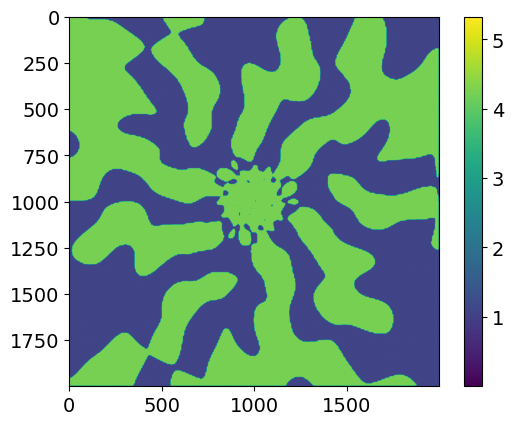

2.719463
Toliman(
  optics=TolimanOpticalSystem(
    wf_npixels=2000,
    diameter=0.025,
    layers={
      'aperture':
      TransmissiveLayer(transmission=f32[2000,2000], normalise=True),
      'pupil':
      Optic(opd=None, phase=f32[2000,2000], transmission=None, normalise=False)
    },
    psf_npixels=2048,
    oversample=1,
    psf_pixel_scale=1.875
  ),
  source=AlphaCen(
    separation=40,
    position_angle=30,
    x_position=0.0,
    y_position=0.0,
    log_flux=6.832,
    contrast=3.37,
    bandpass=(530, 640),
    weights=f32[2,10],
    wavelengths=f32[10]
  ),
  detector=None,
  osys=TolimanOpticalSystem(
    wf_npixels=2000,
    diameter=0.125,
    layers={
      'aperture':
      TransmissiveLayer(transmission=f32[2000,2000], normalise=True),
      'pupil':
      Optic(opd=None, phase=f32[2000,2000], transmission=None, normalise=False)
    },
    psf_npixels=2048,
    oversample=1,
    psf_pixel_scale=0.375
  )
)


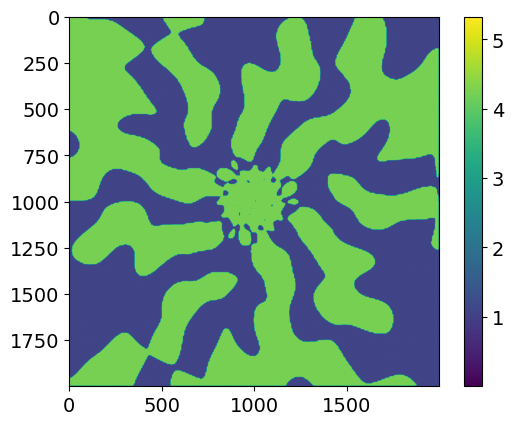

In [ ]:
# plt.imshow(phase_mask)
# plt.colorbar()
# plt.show()
# print(np.mean(phase_mask))
# print(instrument)
# plt.imshow(instrument.pupil.phase)
# plt.colorbar()

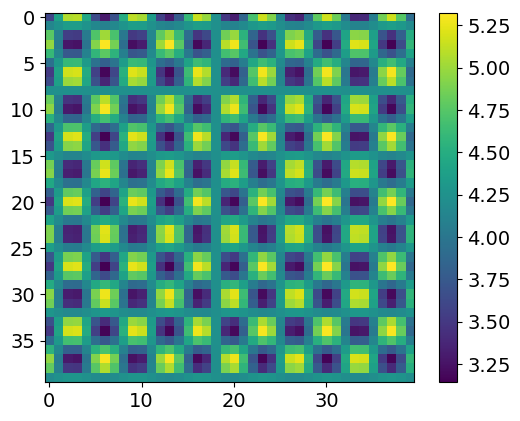

In [ ]:
# plt.imshow(instrument.pupil.phase[10:50, :40])
# plt.colorbar()

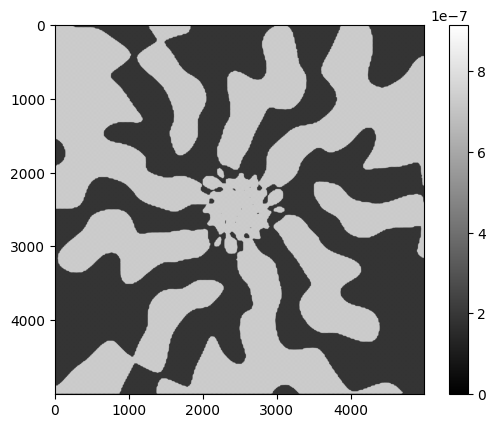

In [ ]:
plt.imshow(raw_mask,cmap='gray')
plt.colorbar()
plt.show()

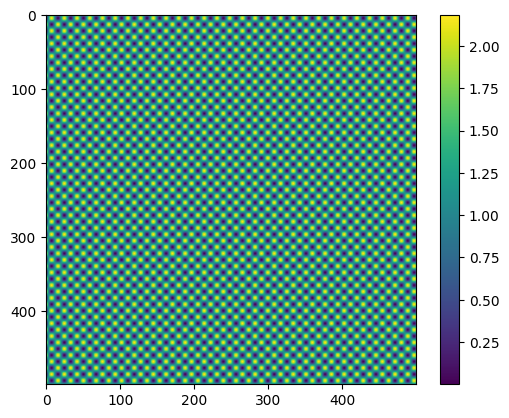

0.3476878
2.184587
7.78201e-06
2.1845949


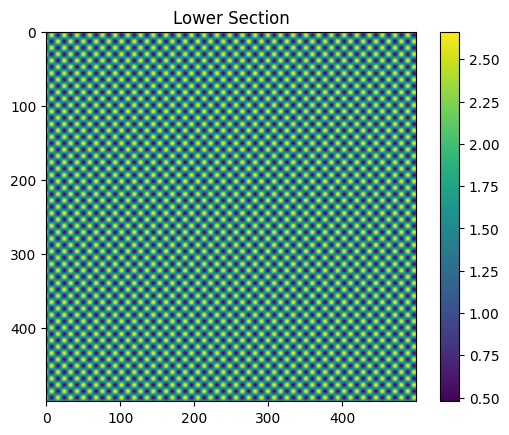

1.5707965


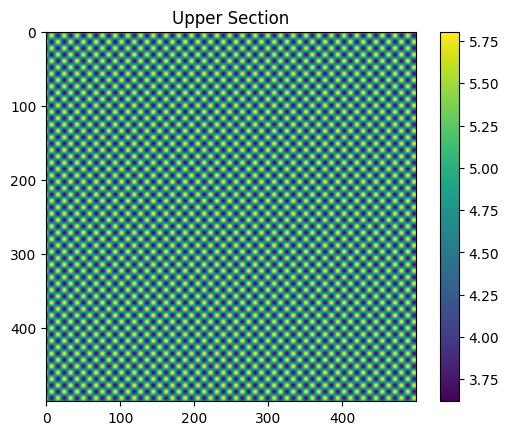

4.712391


In [ ]:
#cutout = phase_mask[350:400,0:50]
cutout = phase_mask[3500:4000,0:500]
#cutout = phase_mask[1400:1650,0:250]
#cutout = phase_mask[3000:3200,200:400]
plt.imshow(cutout)
plt.colorbar()
plt.show()
print((cutout.max()- cutout.min())/(2*np.pi))
print(cutout.max()- cutout.min())
print(cutout.min())
print(cutout.max())


cutout_mean = np.mean(cutout)
elevation = (0.5*np.pi - cutout_mean)
phase_mask_elevated = phase_mask + elevation

#low_cutout_elevated = phase_mask_elevated[350:400,0:50]

low_cutout_elevated = phase_mask_elevated[3500:4000,0:500]
#low_cutout_elevated = phase_mask_elevated[1400:1650,0:250]
#cutout_elevated = phase_mask_elevated[3000:3200,200:400]
plt.imshow(low_cutout_elevated)
plt.title('Lower Section')
plt.colorbar()
plt.show()
print(np.mean(low_cutout_elevated))

#high_cutout_elevated = phase_mask_elevated[50:100,0:50]
high_cutout_elevated = phase_mask_elevated[500:1000,0:500]
#high_cutout_elevated = phase_mask_elevated[750:950,520:720]
#high_cutout_elevated = phase_mask_elevated[100:350,0:250]
plt.imshow(high_cutout_elevated)
plt.title('Upper Section')
plt.colorbar()
plt.show()
print(np.mean(high_cutout_elevated))


Calculate phase amplitude

In [ ]:
p2p = (low_cutout_elevated.max()- low_cutout_elevated.min())/(2*np.pi)
print(p2p)

0.3476878


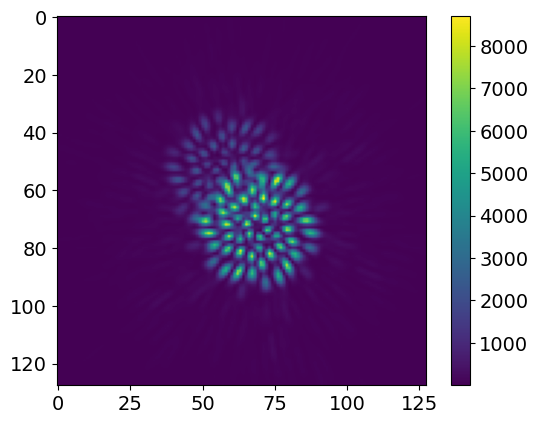

In [ ]:
# central = psf[c-s:c+s, c-s:c+s]
# #plt.title(psf[c-s:c+s, c-s:c+s].sum())
# plt.imshow(central)
# plt.savefig('psf_center.png',dpi=500)
# plt.colorbar()
# plt.show()

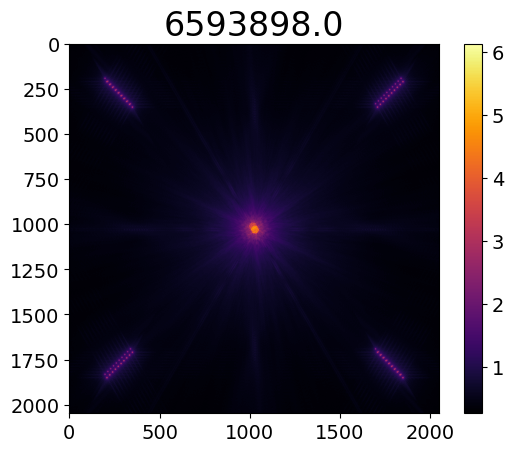

3.75e-07
0.6795488


In [ ]:
plt.title(psf.sum())
#plt.imshow(psf**0.1)
plt.imshow(psf**0.2, cmap='inferno')
plt.colorbar()
plt.savefig("full_psf.png")
plt.show()
print(amplitude)
print(central.sum()/psf.sum())

In [ ]:
# psf[150:400, 150:400].sum()*100

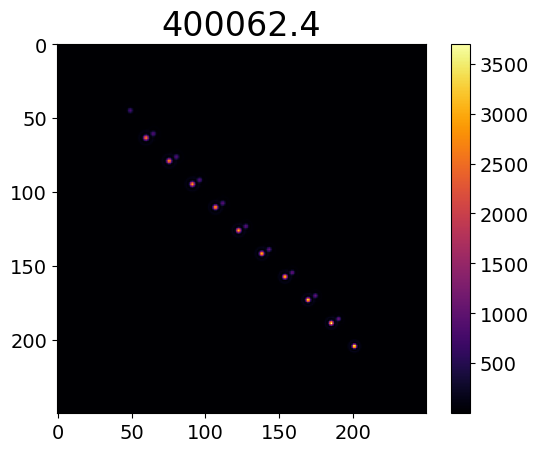

0.06067161


In [ ]:
# side_lobe = psf[150:400, 150:400]

# plt.title(side_lobe.sum())
# plt.imshow(side_lobe, cmap='inferno')
# plt.colorbar()
# plt.savefig("sidelobe.png")
# plt.show()
# print(side_lobe.sum()/psf.sum())    

In [ ]:
optics

TolimanOpticalSystem(
  wf_npixels=2000,
  diameter=0.125,
  layers={
    'aperture':
    TransmissiveLayer(transmission=f32[2000,2000], normalise=True),
    'pupil':
    Optic(opd=None, phase=f32[2000,2000], transmission=None, normalise=False)
  },
  psf_npixels=2048,
  oversample=1,
  psf_pixel_scale=0.375
)

Cut out the circular parts

In [ ]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [ ]:
def create_circular_cutout(diameter_ratio, centre, aperture_npix):
    radius = aperture_npix * diameter_ratio / 2
    mask = create_circular_mask(aperture_npix, aperture_npix, center=centre, radius=radius)
    return mask

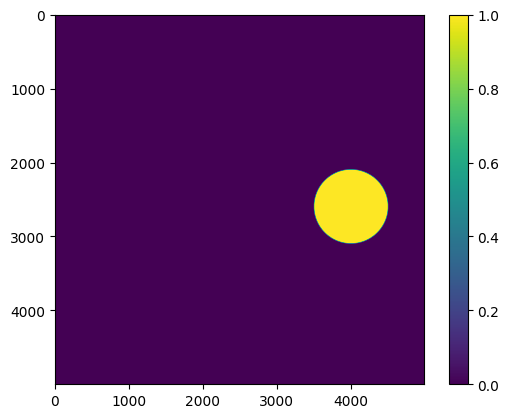

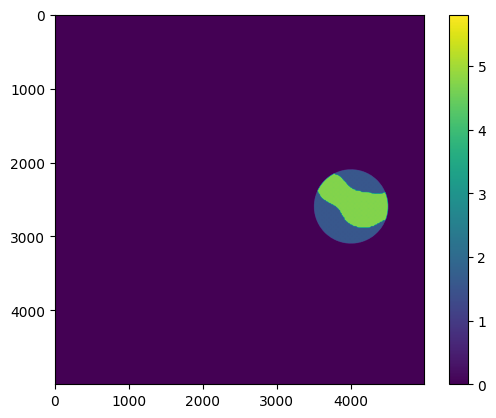

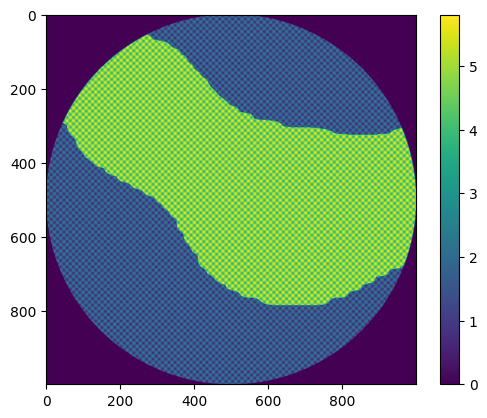

In [ ]:
inch_cutout = create_circular_cutout(0.2, (4000,2600), aperture_npix)
plt.imshow(inch_cutout)
plt.colorbar()
plt.show()

inch_cutout_elevated_phase_mask = (phase_mask+elevation) * inch_cutout
plt.imshow(inch_cutout_elevated_phase_mask,cmap="viridis")
plt.colorbar()
plt.show()


radius = int(aperture_npix * 0.2 / 2)
zoom = inch_cutout_elevated_phase_mask[(2600-radius):(2600+radius),(4000-radius):(4000+radius)]
plt.imshow(zoom,cmap="viridis")
plt.colorbar()
plt.show()

plt.imsave('inch_cutout.png', zoom)
np.save('inch_cutout.npy', zoom)

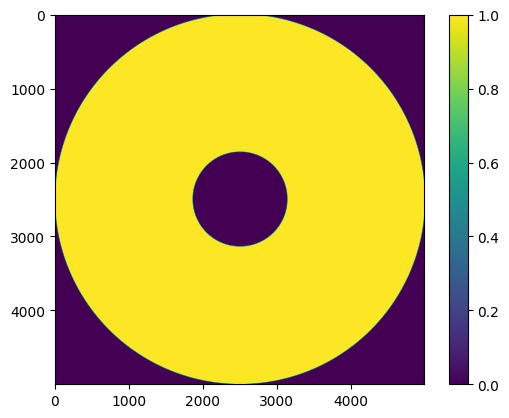

In [ ]:
circular_mask_outer = create_circular_mask(aperture_npix,aperture_npix, radius=aperture_npix/2)
inner_r = (aperture_npix*(secondary_diameter/aperture_diameter))/2
circular_mask_inner = 1 - create_circular_mask(aperture_npix,aperture_npix, radius=inner_r)
circular_mask = circular_mask_outer & circular_mask_inner
plt.imshow(circular_mask)
plt.colorbar()
plt.show()

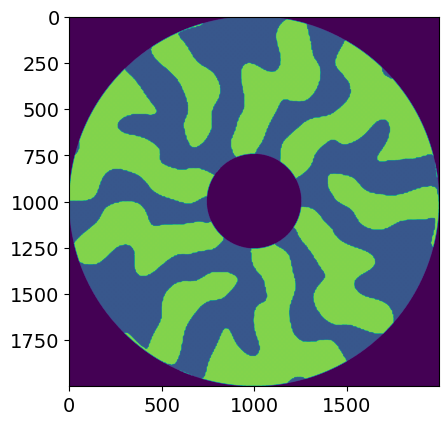

In [ ]:
circular_elevated_phase_mask = (phase_mask+elevation) * circular_mask
#print(circular_elevated_phase_mask)

plt.rcParams.update({'font.size': 20})
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#000000','#02bde4'])

plt.imshow(circular_elevated_phase_mask,cmap="viridis")
# ticks = np.linspace(0,4096,3)
# ticklabels_x = np.linspace(-63,63,3)
# ticklabels_y = np.linspace(63,-63,3)
# ax.set_xticks(ticks)
# ax.set_xticklabels(ticklabels_x)
# ax.set_yticks(ticks)
# ax.set_yticklabels(ticklabels_y)
# plt.xlabel('x (pixels)')
# plt.ylabel('y (pixels)')
# plt.colorbar(label = 'Phase (rad)')
plt.imsave('full_diffractive_pupil.png', circular_elevated_phase_mask)
plt.show()

Convert the mask to a bitmap (adding to make mean pi)

In [ ]:
np.save('new_diffractive_pupil.npy', circular_elevated_phase_mask)

TypeError: Image data of dtype object cannot be converted to float

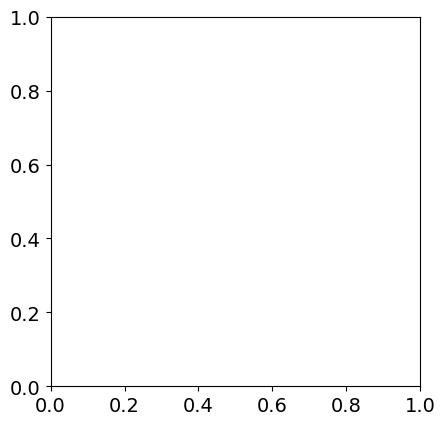

In [ ]:
plt.imshow(mask)
plt.colorbar()

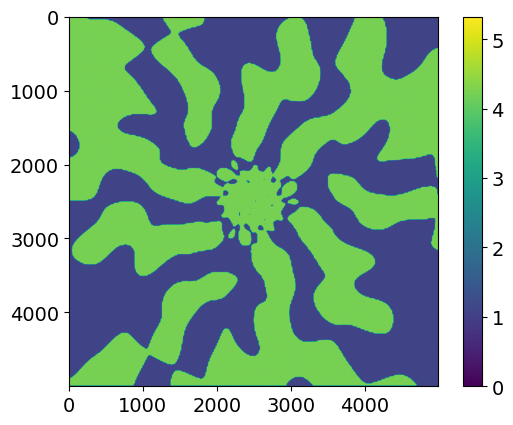

In [ ]:
plt.imshow(phase_mask)
plt.colorbar()

In [ ]:
period = calculate_grating_period(max_reach, pixel_scale, det_npixels, wavelengths, aperture_diameter, aperture_npix)
print(period)

Grating amplitude: 12.154280662536621
Nyquist Ratio: 6.0771403312683105
0.000303857


TypeError: Image data of dtype object cannot be converted to float

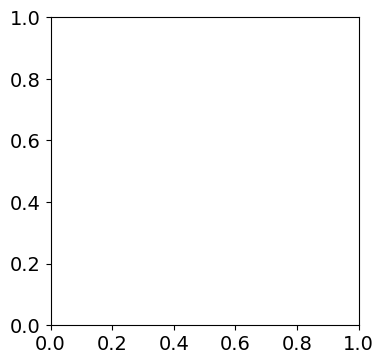

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mask)
# plt.imshow(raw_mask)
plt.colorbar()

plt.subplot(1, 2, 2)
s0 = 1500
s1 = s0 + 100
plt.imshow(mask[s0:s1, s0:s1])
# plt.imshow(raw_mask[s0:s1, s0:s1])
plt.colorbar()
plt.show()

In [ ]:
# !pip install dLuxToliman -q

In [ ]:
mesh_to_stl(X, Y, mask, aperture_npix, 'files/test_file_m', unit_in='m', unit_out='m', binary=True)
mesh_to_stl(X, Y, mask, aperture_npix, 'files/test_file_mm', unit_in='m', unit_out='mm', binary=True)
mesh_to_stl(X, Y, mask, aperture_npix, 'files/test_file_um', unit_in='m', unit_out='um', binary=True)
mesh_to_stl(X, Y, mask, aperture_npix, 'files/test_file_nm', unit_in='m', unit_out='nm', binary=True)

In [ ]:
large_mask = mask * 1e3
mesh_to_stl(X, Y, large_mask, aperture_npix, 'files/test_file_1e3_m', unit_in='m', unit_out='m', binary=True)
mesh_to_stl(X, Y, large_mask, aperture_npix, 'files/test_file_1e3_mm', unit_in='m', unit_out='mm', binary=True)
mesh_to_stl(X, Y, large_mask, aperture_npix, 'files/test_file_1e3_um', unit_in='m', unit_out='um', binary=True)
mesh_to_stl(X, Y, large_mask, aperture_npix, 'files/test_file_1e3_nm', unit_in='m', unit_out='nm', binary=True)

In [ ]:
large_mask = mask * 1e6
mesh_to_stl(X, Y, large_mask, aperture_npix, 'files/test_file_1e6_m', unit_in='m', unit_out='m', binary=True)
mesh_to_stl(X, Y, large_mask, aperture_npix, 'files/test_file_1e6_mm', unit_in='m', unit_out='mm', binary=True)
mesh_to_stl(X, Y, large_mask, aperture_npix, 'files/test_file_1e6_um', unit_in='m', unit_out='um', binary=True)
mesh_to_stl(X, Y, large_mask, aperture_npix, 'files/test_file_1e6_nm', unit_in='m', unit_out='nm', binary=True)

In [ ]:
import dLux
class ApplyMask(dLux.optics.OpticalLayer):
    depth : np.ndarray
    n : np.ndarray

    def __init__(self, depth, n):
        super().__init__(name='ApplyMask')
        self.depth = np.asarray(depth, float)
        self.n = np.asarray(n, float)
    
    def __call__(self, wavefront):
        opd = self.depth * self.n
        return wavefront.add_opd(opd)

In [ ]:
# Primary and secondary parameters
wf_npix = aperture_npix
layers = [dl.CreateWavefront(wf_npix, aperture_diameter, 'Angular')]

# Aperture parameters
secondary_ratio = secondary_diameter/aperture_diameter
spider_ratio    = spider_width/aperture_diameter
aperture = dl.ApertureFactory(wf_npix, 
                             secondary_ratio=secondary_ratio, 
                             nstruts=3, 
                             strut_rotation=-np.pi/2, 
                             strut_ratio=spider_ratio)
layers.append(aperture)
layers.append(dl.NormaliseWavefront())

# # Mask
# layers.append(dl.AddOPD(mask))

# # CLIMB mask
# seed = 0
# mask_basis = np.load("optimisation_params/basis.npy")
# mask_coeffs = jr.normal(jr.PRNGKey(seed), (mask_basis.shape[0],))
# mask = dl.ApplyBasisCLIMB(mask_basis, spec_wavelengths.mean(), mask_coeffs)
# layers.append(mask)
layers.append(ApplyMask(mask, n2))

# # Aberrations layer
# zernike_basis = 1e-9*dl.SimpleAperture(wf_npix, zernikes=np.arange(4, 11)).basis
# aberrations = dl.ApplyBasisOPD(zernike_basis)
# layers.append(aberrations)

# Propagator
# det_npix = 200
oversample = 1
# pixelscale = arcsec_to_rad(0.375)
propagator = dl.AngularMFT(oversample*det_npixels, pixel_scale/oversample, 
                           pixel_shift=True)
layers.append(propagator)

# Optics and telescope
optics = dl.Optics(layers)

In [ ]:
optics.summarise()

In [ ]:
full_wavels = np.linspace(545e-9, 645e-9, 100)

source = dl.PointSource(wavelengths=full_wavels)
psf = optics.model(source=source)

In [ ]:
psf.sum()

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title("Full Chip")
plt.imshow(psf)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Full Chip sqrt scale")
plt.imshow(psf**0.5)
plt.colorbar()
plt.savefig("full_chip")

In [ ]:
# Central region
c = psf.shape[0]//2
s = 100

cen = psf[c-s:c+s, c-s:c+s]

# Corners
s0 = 170
s1 = s0 + 200

corn1 = psf[s0:s1, s0:s1] # Top left
corn2 = psf[s0:s1, -s1:-s0] # Top right
corn3 = psf[-s1:-s0, s0:s1] # Bottom left
corn4 = psf[-s1:-s0, -s1:-s0] # Bottom right
corns = [corn1, corn2, corn3, corn4]

s = 1e3
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 5)
plt.title(f"{cen.sum()*100:.2f}% total flux")
plt.imshow(cen*s)
plt.colorbar()

indexes = [1, 3, 7, 9]
for i in range(len(corns)):
    plt.subplot(3, 3, indexes[i])
    plt.title(f"{corns[i].sum()*100:.2f}% total flux")
    plt.imshow(corns[i]*s)
    plt.colorbar()

plt.savefig("transmissive_mask.png")

In [ ]:
print(np.array(corns).sum())

In [ ]:
psf.sum()

In [ ]:
import pathlib

In [ ]:
pathlib.Path

In [ ]:
import os

print(os.getcwd())
p = pathlib.Path("test")

In [ ]:
isinstance(p, pathlib.Path)

In [ ]:
str(p)

In [ ]:
import zodiax as zdx
from jax import numpy as np, scipy as scp


# A simple class to model 1d normals
class Normal(zdx.Base):
    mean      : np.ndarray
    scale     : np.ndarray
    amplitude : np.ndarray

    def __init__(self, mean, scale, amplitude):
        self.mean      = np.asarray(mean,      dtype=float)
        self.scale     = np.asarray(scale,     dtype=float)
        self.amplitude = np.asarray(amplitude, dtype=float)
    
    def model(self, width=10):
        xs = np.linspace(-width, width, 128)
        return self.amplitude * scp.stats.norm.pdf(xs, self.mean, self.scale)


# A class to store and model a set of normals
class NormalSet(zdx.Base):
    normals : dict
    width   : np.ndarray

    def __init__(self, means, scales, amplitude, names, width=10):
        normals = {}
        for i in range(len(names)):
            normals[names[i]] = Normal(means[i], scales[i], amplitude[i])
        self.normals = normals
        self.width = np.asarray(width, dtype=float)
    
    def __getattr__(self, key):
        if key in self.normals.keys():
            return self.normals[key]
        else:
            raise AttributeError(f"{key} not in {self.normals.keys()}")
    
    def model(self):
        return np.array([normal.model(self.width) 
            for normal in self.normals.values()]).sum(0)

sources = NormalSet([-1., 2.], [1., 2.], [2., 4.], ['alpha', 'beta'])

In [ ]:
zdx.experimental.serialise(p, sources)